# Librerias

In [1]:
#Librerias necesarias para este proyecto
import numpy as np
import matplotlib.pyplot as plt

#La librería SK Learn es requerida para crear los datasets.
from sklearn.datasets import make_circles

Amable recordatorio: con ? puedes acceder a la documentacion del metodo.

# Creacion del dataset

A continuación, vamos a inicializar el dataset de puntos que vamos a clasificar. La variable X son las tuplas que contienen las coordenadas en el plano de cada punto, la variable Y es un vector que define a que clase (dos clases, 0 o 1) pertenece cada punto.

(500, 2)
(500, 1)


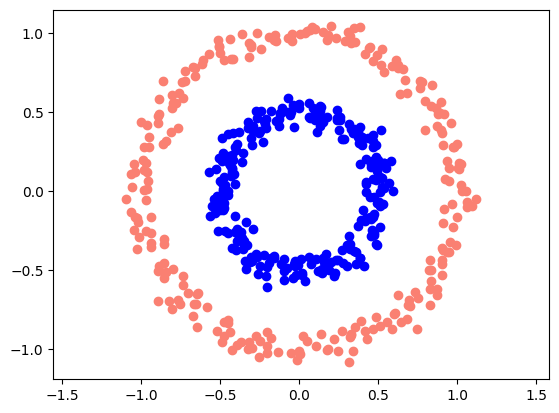

In [2]:
#Inicializar las variables n y p.
#Donde n es el tamaño dl dataset y p es el número de atributos que contiene un punto. 
n = 500 #El número de registros
p = 2   #¿Cuantas características tengo en cada dato?

#Generacion de los puntos de los circulos
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
print(X.shape)

Y = Y[:, np.newaxis] # Solucion de error de decenso del gradiente 
print(Y.shape)


#Representacion de los datos creados
#plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='salmon')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='blue')

#graficar
plt.axis('equal')
plt.show()

# Clase de la capa de la red

A continuación, crearemos una clase (en el contexto del paradigma de POO) que contenga los atributos de una capa de neuronas. Esta estructura contiene el **número de conexiones, el número de neuronas, la función de activación**, el vector de ballas y la matriz de pesos. Tanto el vector de ballas como la matriz de pesos contienen valores al azar normalizados (valores aleatorios entre -1 y 1).

In [3]:
#La unidad de procesamiento es la neurona y por lo que se puede pensar como una objeto
#Estructura de datos que contiene la los parametros de la red neuronal
class Neural_layer():
    def __init__(self, n_conn, n_neur, act_f): # numero de conecciones, numero de nuronas en la capa, funcion de activacion
        self.act_f = act_f
        self.b = np.random.rand(1     , n_neur) * 2 - 1 #ballas # Declaracion normalizada aleatorios de  -1 a 1 
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1 #tantas conexiones como neuronas


# Funciones de activacion

En la siguiente celda definiremos la función de activación de la tangente sigmoide y su derivada. Ambas funciones están en una tupla, donde la primer componente de la tupla es la función y la segunda componente es su derivada.

<h2 style="text-align: center">
    <div style="padding: 25px; font-size: 30px">
        $sigm = \frac{1}{1 + e^{-x}}$
    </div>
    <div style="padding: 25px">
        $d(sigm) = x(1 - x)$
    </div>  
</h2>

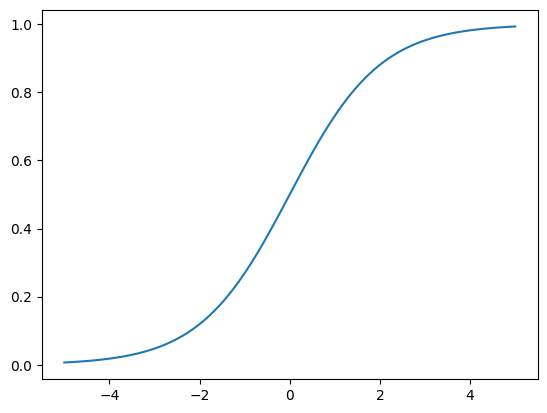

In [4]:
#Funcion sigmoide y su derivada como tupla
sigm = (lambda x: 1 / ( 1 + np.e ** (-x)), 
        lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))

# Diseño de la red neuronal

Construir la arquitectura de la red con neural_layer es repetitivo. Por lo que empleando una función y una lista podemos automatizar este proceso.

In [5]:
def create_nn(topology, act_f):
    nn = [] #Extructura de datos que contendra cada una de las capas de la red nuronal
    
    for idx, value in enumerate(topology[:-1]):
    
        nn.append(Neural_layer(topology[idx], topology[idx+1], act_f))
    
    return nn


topology = [p, 4, 8, 1]
# p son las entradas
# para genera un resultado binario la ultima capa o capa de salida debe de ser de una neurona


# Logica de entrenamiento

## Definimos la función de entrenamiento de la red
En la siguiente celda se puede observar, que la variable l2_cost se compone de una tupla de dos funciones lambda. Donde la primera componente es la función de coste o ECM y la segunda componente es la derivada de la función de coste.

In [6]:
#Error cuadratico medio y su derivada
#Tambien es definida como funcion de coste
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

En este punto del proyecto la red neuronal ya está construida, pero no ha sido entrenada ni ajustada.

# Entrenamiento

La función de entrenamiento contempla los siguientes pasos:

1. Propagación hacia adelante. Forwared pass.
2. Comparar resultados obtenidos con los esperados.
3. Propagación hacia atras. Backpropagation and Gradient descent.

### Forwared pass
1. pasar el vector de entrada capa por capa. 
2. Ejecutando las operaciones en cada neurona. 
3. la suma onderada de wx posterior pasarlo a su funcion de activacion.
4. y repetimos este proceso 
<pre>
    z = X @ neural_net[0].W + neural_net[0].b
    a = neural_net[0].act_f(z)
    
    z = a @ neural_net[1].W + neural_net[1].b
    a = neural_net[1].act_f(z) 
    
    ...  

In [7]:
#Función de entrenamiento
#lr referencia el learning ratio
#train al ser falso solo realiza una predicción sin entrenamiento

def train(neural_net, X, Y, f_cost,lr=0.5,train=True):
    
    # Guardaremos el valor de la suma ponderada, el valor de activacion. para cada capa.
    # Por lo que estamso guarda los pares de z y a [(z0,a0),(z1,a1),...]    
    out=[(None,X)] 

    #1. Propagación hacia adelante. Forwared pass. predicción no entrenada.
    for idx, layer in enumerate( neural_net ):
    
        #z = np.dot(out[-1][1],neural_net[idx].W) + neural_net[idx].b
        z = out[-1][1] @ neural_net[idx].W + neural_net[idx].b
        
        a = neural_net[idx].act_f[0](z)
   
        out.append((z,a))

    
    #2. Backward pad.
    if train:
        delta=[]
    
        for idx in reversed(range(0,len(neural_net))):
            z=out[idx+1][0]
            a=out[idx+1][1]
      
            #Algoritmo delta de última capa
            if idx == len(neural_net) - 1:
                
                #derivada de la funcion de coste * derivada de la funcion de activacion de la ultima capa
                delta.insert(0, f_cost[1](a, Y) * neural_net[idx].act_f[1](a))
            
            #Algorimo delta respecto a la capa previa
            else:
                #(Valor del delta anterior @ vector de pesos W) * derivada de la funcion de activacion de la capa
                
                #delta.insert(0, np.dot(delta[0] , aux_w.T) * neural_net[idx].act_f[1](a))
                delta.insert(0, delta[0] @ aux_w.T * neural_net[idx].act_f[1](a))
          
            #VEctor de pesos guardado en un aux. Debido a su pos modificación
            aux_w = neural_net[idx].W 
            
          
            #3. Gradient Descent: 
            #Ajuste del valor del vector de ballas y el valor la matriz de pesos.
            
            #Se restara el parametro b de la capa idx respecto al coste
            #El coste es la deribada parcial. En funcion de delta la deribada parcial es delta (por su lr)
            #Delta ahora mismo tiene 500 valores por lo que se debe usar su valor medio...
                # con el fin de ajustar dimenciones.
            neural_net[idx].b = neural_net[idx].b - np.mean(delta[0], axis=0, keepdims=True) * lr
            
            #se restara parametro b de la capa idx respecto a la multiplicacion matricial...
                #la activacion de la capa anterior @ deltas * lr            
            
            #neural_net[idx].W = neural_net[idx].W - np.dot(out[idx][1].T, delta[0]) * lr
            neural_net[idx].W = neural_net[idx].W - out[idx][1].T @ delta[0] * lr
          
    return out[-1][1]


# Enfrentamos a la red con los datos y presentamos resultados.

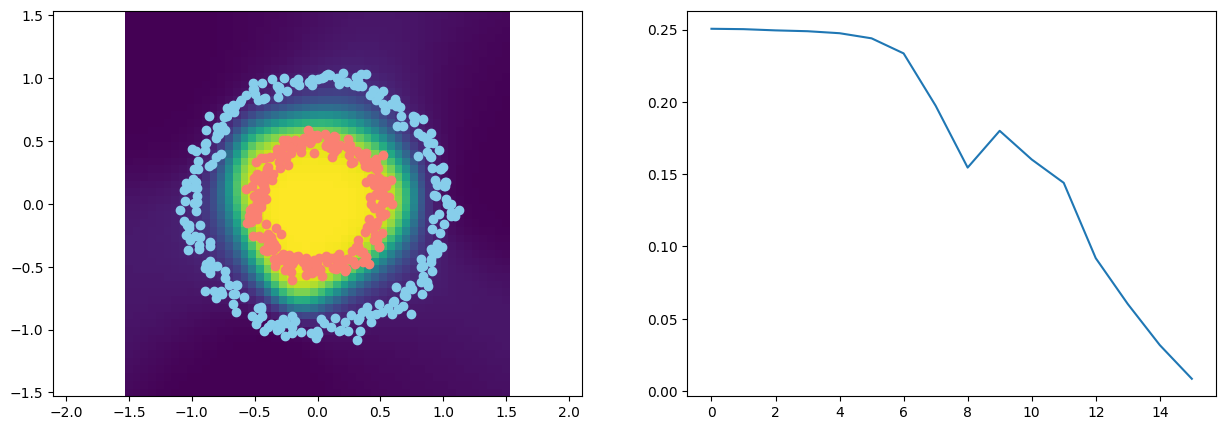

Numero de epocas 375


In [25]:
#Funciones de animacion
import time
from IPython.display import clear_output

#Parametros para enfrentar datos
neural_n = create_nn(topology, sigm)
loss = []
epoc = 2000
min_loss = 0.01

for i in range(epoc):
    
    #Entrenamos la red:
    pY = train(neural_n, X, Y, l2_cost, lr = 0.05)

    #Configuracion del canvas
    if i % 25 == 0:
  
        loss.append(l2_cost[0](pY,Y))

    #Configuracion eficiente. Logro completado antes de acabar las epocas.
    if loss[-1] < min_loss:
        print("Numero de epocas " + str(i))
        break    


res = 50
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

_Y = np.zeros((res, res))

#Enfrentamiento predictivo de la red neuronal
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0,x1]]), Y, l2_cost,train=False)[0][0]

#Visualizamos los resultados del entrenamiento.
plt.figure(3, figsize=(15,5))
plt.subplot(1,2,1)
plt.pcolormesh(_x0, _x1, _Y, cmap = "viridis")
plt.axis("equal")

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c = "skyblue" )
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c = "salmon" )

clear_output(wait = True)
plt.subplot(1,2,2)
plt.plot(range(len(loss)), loss)
plt.show()

time.sleep(0.5)
    
    #Configuracion eficiente. Logro completado antes de acabar las epocas.
if loss[-1] < min_loss:
    print("Numero de epocas " + str(i))
    
